In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading in the CSV and dropping the NaN values ###

In [5]:
###Read in data csv file and choose which columns we want to be included###
evict = pd.read_csv("data/Eviction_Notices.csv", engine='python', on_bad_lines='skip')
    
bad_reasons = evict[['Eviction ID', 'File Date', 'Non Payment', 'Nuisance', 'Illegal Use', 'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 'Failure to Sign Renewal']].dropna()
bad_reasons

,Eviction ID,File Date,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal
0,M222138,12/12/2022,False,True,False,False,False,False,False,False
1,M211838,12/06/2021,False,True,False,False,False,False,False,False
2,M222033,11/14/2022,False,False,False,False,False,False,False,False
3,M221840,10/18/2022,False,False,False,False,False,False,False,False
4,M120930,06/21/2012,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
158041,M020356,03/25/2002,False,False,False,False,False,False,False,False
158042,M101330,09/24/2010,False,False,False,False,False,False,False,False
158043,M070731,04/25/2007,False,False,False,False,False,True,False,False
158044,M061330,08/09/2006,False,False,False,False,False,False,False,False


In [6]:
for col in evict.columns:
    print(col)

Eviction ID
Address
City
State
Eviction Notice Source Zipcode
File Date
Non Payment
Breach
Nuisance
Illegal Use
Failure to Sign Renewal
Access Denial
Unapproved Subtenant
Owner Move In
Demolition
Capital Improvement
Substantial Rehab
Ellis Act WithDrawal
Condo Conversion
Roommate Same Unit
Other Cause
Late Payments
Lead Remediation
Development
Good Samaritan Ends
Constraints Date
Supervisor District
Neighborhoods - Analysis Boundaries
Location
Shape
SF Find Neighborhoods
Current Police Districts
Current Supervisor Districts
Analysis Neighborhoods
DELETE - Neighborhoods
DELETE - Police Districts
DELETE - Supervisor Districts
DELETE - Fire Prevention Districts
DELETE - Zip Codes
CBD, BID and GBD Boundaries as of 2017
Central Market/Tenderloin Boundary
Areas of Vulnerability, 2016
Central Market/Tenderloin Boundary Polygon - Updated
Fix It Zones as of 2018-02-07
Neighborhoods


In [7]:
###same as last cell, just include which neighborhoods they were in. however, some neighborhoods were NaN so we dropped those values and got a different graph###

bad_reasons_with_neighborhood = evict[['Eviction ID', 'Address','File Date', 'Non Payment', 'Nuisance', 'Illegal Use', 'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 'Failure to Sign Renewal', 'Neighborhoods - Analysis Boundaries']].dropna()

sampled = bad_reasons_with_neighborhood.sample(5000).rename({'Neighborhoods - Analysis Boundaries': 'Neighborhoods'}, axis=1)
sampled.head(20)

,Eviction ID,Address,File Date,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal,Neighborhoods
139059,M131785,13311300 Block Of 40th Avenue,09/09/2013,False,False,False,False,False,False,False,False,Sunset/Parkside
64356,M012131,1300 Block Of 20th Avenue,12/17/2001,False,False,False,False,False,False,False,False,Sunset/Parkside
143210,M141384,2800 Block Of Lyon Street,06/23/2014,False,False,False,False,False,False,False,False,Presidio
31064,M090321,100 Block Of Capp Street,03/16/2009,False,False,False,False,False,False,False,False,Mission
125579,E991628,700 Block Of Dolores Street,08/18/1999,False,True,False,False,False,False,False,False,Mission
109802,M090631,400 Block Of Hyde Street,06/03/2009,False,True,False,False,False,False,False,False,Tenderloin
110129,M032505,200 Block Of Kearney Street,07/14/2003,False,True,False,False,False,False,False,False,Financial District/South Beach
139890,M221358,0 Block Of 06th Street,08/23/2022,False,True,False,False,False,False,False,False,South of Market
125896,E981560,400 Block Of Oak Street,07/09/1998,False,False,False,False,False,False,False,False,Hayes Valley
99704,M200067,500 Block Of Pierce Street,01/09/2020,False,True,False,False,False,False,False,False,Hayes Valley


In [8]:
neighborhood_counts = sampled[['Neighborhoods']].value_counts().reset_index(name='counts')
neighborhood_counts.describe()

,counts
count,40.000000
mean,125.000000
std,112.304531
min,2.000000
25%,53.750000
50%,98.500000
75%,158.250000
max,577.000000


<AxesSubplot: xlabel='Neighborhoods'>

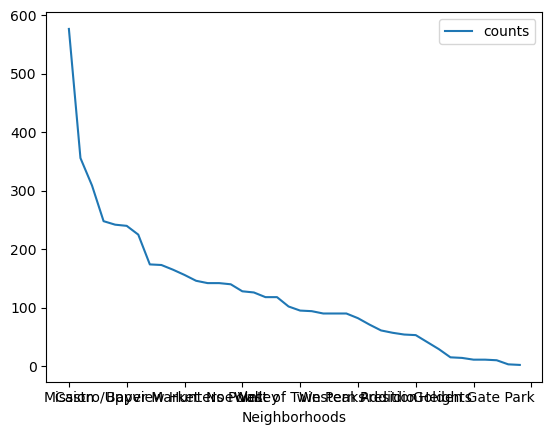

In [9]:
###plot evictions per neighborhood###
neighborhood_counts.plot('Neighborhoods', 'counts')

<BarContainer object of 40 artists>

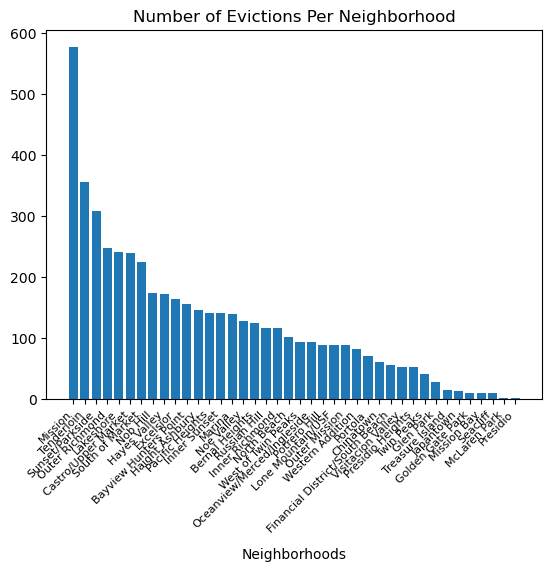

In [11]:
neighs = list(neighborhood_counts["Neighborhoods"])
counts = list(neighborhood_counts["counts"])
fig, ax = plt.subplots()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.xlabel("Neighborhoods", labelpad = 10)
plt.title("Number of Evictions Per Neighborhood")
plt.bar(neighs, counts)

In [121]:
nuisances = sampled[['Nuisance']]

In [122]:
reasons = sampled.iloc[:, 3:11]
reasons

,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal
60584,False,True,False,False,False,False,False,False
129082,False,False,False,False,False,False,False,False
53825,False,False,False,False,False,False,False,False
6225,False,False,False,False,False,False,False,False
60355,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
125431,False,False,False,False,False,False,False,False
142523,False,True,False,False,False,False,False,False
15946,False,False,False,False,False,False,False,False
110880,False,False,False,False,False,False,False,False


   Non Payment  counts
0        False    4666
1         True     334
   Nuisance  counts
0     False    4037
1      True     963
   Illegal Use  counts
0        False    4874
1         True     126
   Unapproved Subtenant  counts
0                 False    4930
1                  True      70
   Demolition  counts
0       False    4864
1        True     136
   Ellis Act WithDrawal  counts
0                 False    4530
1                  True     470
   Late Payments  counts
0          False    4834
1           True     166
   Failure to Sign Renewal  counts
0                    False    4987
1                     True      13
13


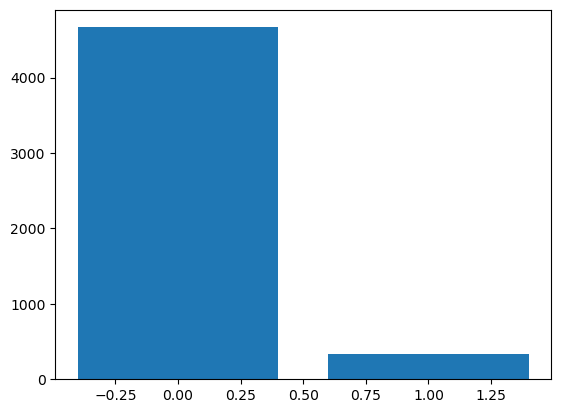

In [123]:
for col in reasons.columns:
    print(sampled[[col]].value_counts().reset_index(name='counts'))

###plot true and false for one column###
payment_ocurr = reasons[['Non Payment']].value_counts().reset_index(name='counts')
payment_ocurr

pay_bool = list(payment_ocurr['Non Payment'])
pay_counts = list(payment_ocurr['counts'])
plt.bar(pay_bool, pay_counts)

#create dataframe with true and false occurrences, maybe make this one of the tests#
columnNames = reasons.columns

for i in reasons.columns:
    true_occurrences = reasons[i].sum()
    false_occurrences = len(reasons) - true_occurrences

data = {"True": true_occurrences, "False": false_occurrences}
combined = pd.DataFrame(data, columnNames)
print(true_occurrences)

In [154]:
###another method to find number of true and false occurrences per reason###
columnNames = reasons.columns
trues_oc = {}

for i in reasons.columns:
    trues_oc[i] = reasons[i].sum()

print(trues_oc)

argh = pd.DataFrame(trues_oc, ['True'], columnNames).reset_index()
print(argh)

{'Non Payment': 334, 'Nuisance': 963, 'Illegal Use': 126, 'Unapproved Subtenant': 70, 'Demolition': 136, 'Ellis Act WithDrawal': 470, 'Late Payments': 166, 'Failure to Sign Renewal': 13}
  index  Non Payment  Nuisance  Illegal Use  Unapproved Subtenant  Demolition  \
0  True          334       963          126                    70         136   

   Ellis Act WithDrawal  Late Payments  Failure to Sign Renewal  
0                   470            166                       13  
